In [1]:
from bs4 import BeautifulSoup
import requests
from PIL import Image

In [2]:
# go to url

url = "https://collections.si.edu/search/results.htm?q="

result = requests.get(url)

# get and parse html of page into tree data structure

doc = BeautifulSoup(result.text, "html.parser")

## collect all images from search page in a robust way

#search for classes thumbnail and record-thumbnail thumbnail

thumbnails = doc.select('[class*="thumbnail"]')


image_urls = []

for th in thumbnails:
    if th.find("img"):
        
        # get src of img tag within the thumbnail class
        
        src = th.find("img").get("src")
    
        image_urls.append(src)


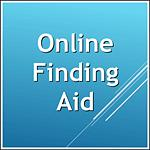

In [3]:
# now we get the image from the URL and show it 

im = Image.open(requests.get(image_urls[0], stream=True).raw)
display(im)

In [4]:
url = "https://naturalhistory.si.edu/sitemap.xml"

result = requests.get(url)

# get and parse html of page into tree data structure

doc = BeautifulSoup(result.text, "html.parser")

urls = doc.find("urlset")

links = [a.text for a in urls.find_all("loc")]

print(links)

C:\Users\mlybo\miniconda3\envs\pymc\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


['https://naturalhistory.si.edu/', 'https://naturalhistory.si.edu/exhibits', 'https://naturalhistory.si.edu/research/anthropology/programs/repatriation-office/repatriation-review-committee/committee-members', 'https://naturalhistory.si.edu/research/anthropology/programs/repatriation-office/repatriation-review-committee/committee-members/ian-thompson', 'https://naturalhistory.si.edu/research/smithsonian-marine-station/news/bringing-sea-schools', 'https://naturalhistory.si.edu/research/anthropology/programs/repatriation-office/repatriation-review-committee/committee-members/bonnie-styles', 'https://naturalhistory.si.edu/research/anthropology/programs/repatriation-office/repatriation-review-committee/committee-members/vincas-steponaitis', 'https://naturalhistory.si.edu/research/anthropology/programs/repatriation-office/repatriation-review-committee/committee-members/darlene-miller', 'https://naturalhistory.si.edu/research/anthropology/programs/repatriation-office/repatriation-review-commi

In [5]:
scrape_data = []

site_url = 'https://naturalhistory.si.edu'

HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

for i in range(len(links)):
    
    page_url = links[i]
    
    if i % 100 == 0:
        print(str(i) + " links visited.")
    
    # get all images from the site
    try:
        page = requests.get(page_url, headers=HEADERS)
    except:
        print("Could not access " + page_url)
        continue
    
    doc = BeautifulSoup(page.text, "html.parser")
    imgs = doc.find_all("img")
    
    for img in imgs:
        
        img_data = {}
        
        src = img.get('src')
    
        if src.startswith("//") or src.startswith("http"):
            src_url = src
        else:
            src_url = 'https://naturalhistory.si.edu' + src
            alt = img.get('alt')
        
        img_data['site_url'] = site_url
        img_data['page_url'] = page_url
        img_data['src'] = src_url        
        img_data['alt'] = alt
        
        scrape_data.append(img_data)
        
    

0 links visited.
Could not access https://naturalhistory.si.edu/research/paleobiology/research/pyenson-lab/publications
100 links visited.
200 links visited.
Could not access https://naturalhistory.si.edu/education/teaching-resources/earth-science/webinar-volcanoes-and-pyroclastic-flows
300 links visited.
400 links visited.
Could not access https://naturalhistory.si.edu/events/after-hours-programs-adults/video-webinars-outbreak-epidemics-connected-world/grassroots-leaders-reversing-hiv-stigma-peter-staley-david-france-requel-lopes-and-linda-villarosa
500 links visited.
Could not access https://naturalhistory.si.edu/events/after-hours-programs-adults/virtual-science-cafe-planes-parasites-and-paleontology
Could not access https://naturalhistory.si.edu/events/family-programs/webinar-natural-history-home-what-fossil
Could not access https://naturalhistory.si.edu/education/teaching-resources/life-science/webinar-expedition-island-land-crabs
Could not access https://naturalhistory.si.edu/res

In [14]:
with open('natural_history.csv', 'w') as csvfile:
    

992

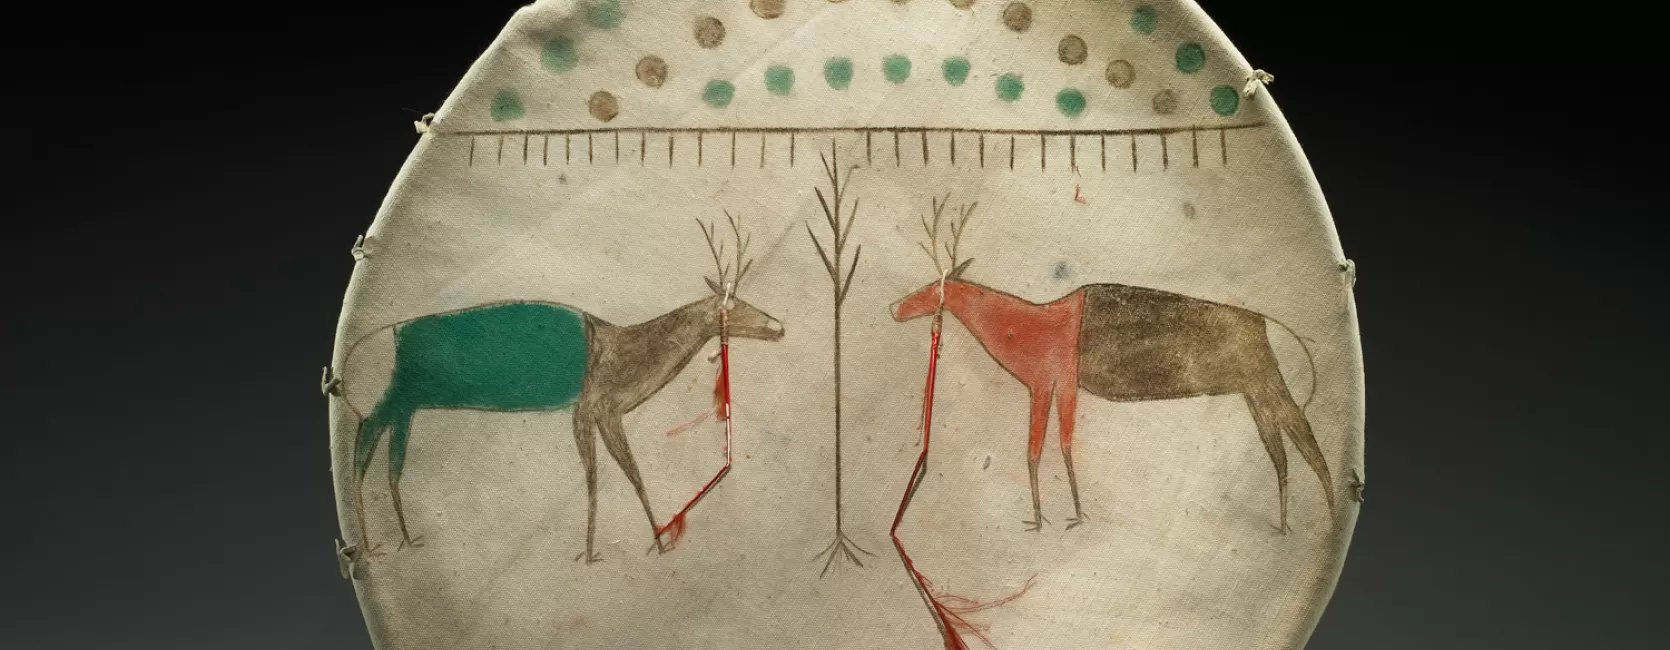

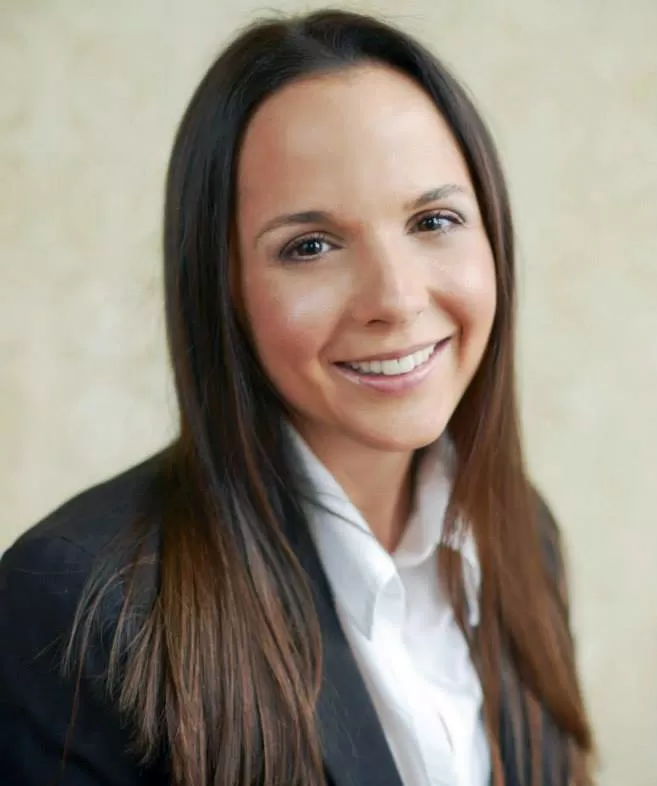

In [37]:
img_url = 'https://naturalhistory.si.edu/research/anthropology/programs/repatriation-office/repatriation-review-committee/committee-members/jaime-arsenault'
site = requests.get(img_url)
doc = BeautifulSoup(site.text, "html.parser")

#get list of img tags
imgs = doc.find_all("img")

for img in imgs:
    
    src = img.get('src')
    
    if src.startswith("//") or src.startswith("http"):
        src_url = src
    else:
        src_url = 'https://naturalhistory.si.edu' + src
    
    im = Image.open(requests.get(src_url, stream=True).raw)
    display(im)


In [49]:
# build a list of dictionaries
# each dictionary stores page url, site url, existing alt text (if present), img src



In [15]:
page = requests.get('https://naturalhistory.si.edu/staff/nicholas-pyenson')  

doc = BeautifulSoup(page.text, "html.parser")

print(doc)  


<!DOCTYPE html>

<html class="no-js" dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<link href="http://naturalhistory.si.edu/staff/nicholas-pyenson" rel="canonical"/>
<meta content="Smithsonian National Museum of Natural History" property="og:site_name"/>
<meta content="http://naturalhistory.si.edu/staff/nicholas-pyenson" property="og:url"/>
<meta content="Pyenson, Nicholas" property="og:title"/>
<meta content="summary" name="twitter:card"/>
<meta content="@NMNH" name="twitter:site"/>
<meta content="http://naturalhistory.si.edu/staff/nicholas-pyenson" name="twitter:url"/>
<meta content="Drupal 9 (https://www.drupal.org)" name="Generator"/>
<meta content="width" name="MobileOptimized"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<script type="application/ld+json">{
    "@context": "https://schema.org",
    "@graph": [
        {
            "@type": "Person",
            "nam

In [8]:
import csv
csv_columns = ['site_url', 'page_url', 'src', 'alt']

with open("natural_history.csv", 'w', encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for data in scrape_data:
        writer.writerow(data)

In [1]:
nh_df.sample(10)

NameError: name 'nh_df' is not defined

In [ ]:
# how to create the right interface
# command line script?